**Team Members**

1. Solasa, Venkata Naga Ramesh

2. Dowluri, Satya Ashok

3. Shaik, Rajmal Basha

4. Maddirala, Sai Karthik

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# for manipulations
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

# for data visualizations
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
data_dir = '/content/drive/My Drive/DataScience'

In [ ]:
# Importing data
df = pd.read_csv(f"{data_dir}/Crop_recommendation.csv")
print(df.shape)

(2200, 8)


**Data Analysis**

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<ipython-input-50-06695d843dcc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


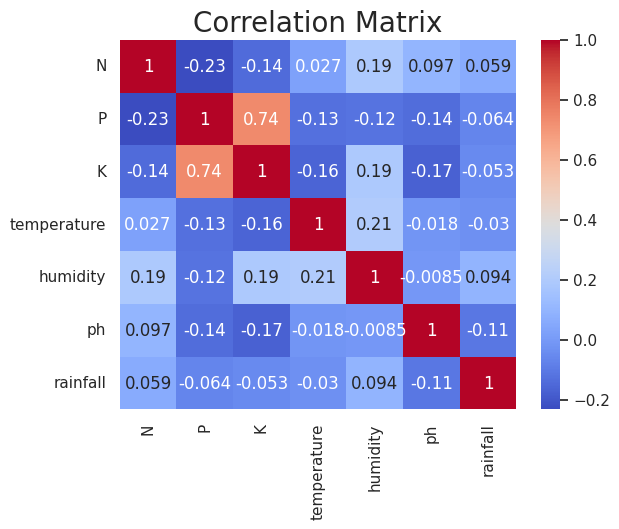

In [ ]:
corr = df.corr()
ax = sns.heatmap(corr,annot=True, cbar=True, cmap='coolwarm')


plt.title("Correlation Matrix", fontsize = 20); # title with fontsize 20

**Data Preparation**

In [ ]:
LE = LabelEncoder()
df['label'] = LE.fit_transform(df['label'])
print(LE.classes_)


['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [ ]:
print(np.sort(df['label'].unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
features = df[['N','P','K','temperature','humidity','ph','rainfall']]
labels = df['label']

In [ ]:
accuracies=[]
f1=[]
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.20, random_state = 42)

In [ ]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_train)

(1760, 7)
[[0.12142857 0.07857143 0.045      ... 0.9089898  0.48532225 0.29685161]
 [0.26428571 0.52857143 0.07       ... 0.64257946 0.56594073 0.17630752]
 [0.05       0.48571429 0.1        ... 0.57005802 0.58835229 0.08931844]
 ...
 [0.07857143 0.22142857 0.13       ... 0.43760347 0.46198144 0.28719815]
 [0.07857143 0.85       0.995      ... 0.76763665 0.44420505 0.18346657]
 [0.22857143 0.52142857 0.085      ... 0.56099735 0.54465022 0.11879596]]


In [ ]:
# values =[[ 60, 22, 44,	23.004459,	82.320763,	7.840207,	263.964248]]
# new_values = scaler.transform(values)
# print(new_values)

[[0.42857143 0.12142857 0.195      0.40685389 0.79394    0.67421874
  0.87564394]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## DecisionTree Classifier

In [ ]:
tree = DecisionTreeClassifier()

# Training
tree = tree.fit(X_train, Y_train)

y_pred_tree = tree.predict(X_test)

accuracy_dt = accuracy_score(Y_test, y_pred_tree)

f1_dt=f1_score(Y_test,y_pred_tree, average='macro')

accuracies.append(accuracy_dt*100)

f1.append(f1_dt)

print("Accuracy of Decision Tree", accuracy_dt*100)
print("f1_score of Decision Tree", f1_dt)

Accuracy of Decision Tree 98.4090909090909
f1_score of Decision Tree 0.9840607725019178


In [ ]:
feature_importance = tree.feature_importances_

print(feature_importance)
# Print feature importances
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

[0.0949812  0.1625471  0.14507838 0.00422014 0.23423051 0.01168647
 0.3472562 ]
Feature 1: 0.09498119779853861
Feature 2: 0.16254710286040108
Feature 3: 0.1450783844350624
Feature 4: 0.004220138184284707
Feature 5: 0.2342305058063891
Feature 6: 0.011686466808410666
Feature 7: 0.3472562041069134


Text(46.25, 0.5, 'Predicted Values')

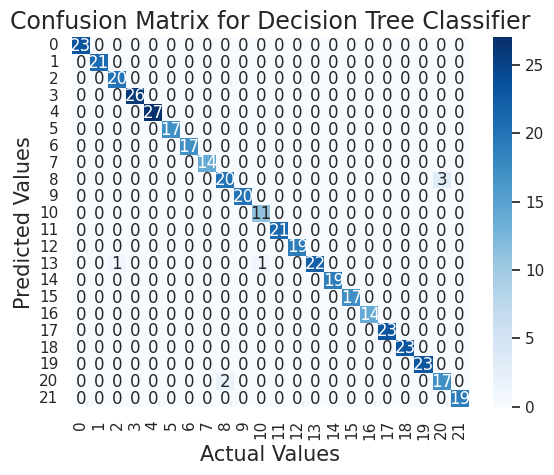

In [ ]:
cm= confusion_matrix(Y_test, y_pred_tree)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

plt.title("Confusion Matrix for Decision Tree Classifier", fontsize = 17) # title with fontsize 20
plt.xlabel("Actual Values", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("Predicted Values", fontsize = 15) # y-axis label with fontsize 15

## KNN Classifier

In [ ]:
k_values = [3,5,7,9]
knn_accuracy=[]
knn_f1_score=[]


for k_value in k_values:
  model = KNeighborsClassifier(n_neighbors = k_value)

    # Training
  model.fit(X_train,Y_train)

  y_pred = model.predict(X_test)
  accuracy_knn = accuracy_score(Y_test, y_pred)
  f1_knn=f1_score(Y_test,y_pred, average='macro')
  accuracy_knn*100
  knn_accuracy.append(accuracy_knn)
  knn_f1_score.append(f1_knn)


In [ ]:
compare_knn=pd.DataFrame()
compare_knn['K Value']= k_values
compare_knn["Accuracy"]= knn_accuracy
compare_knn["F1_Score"]= knn_f1_score

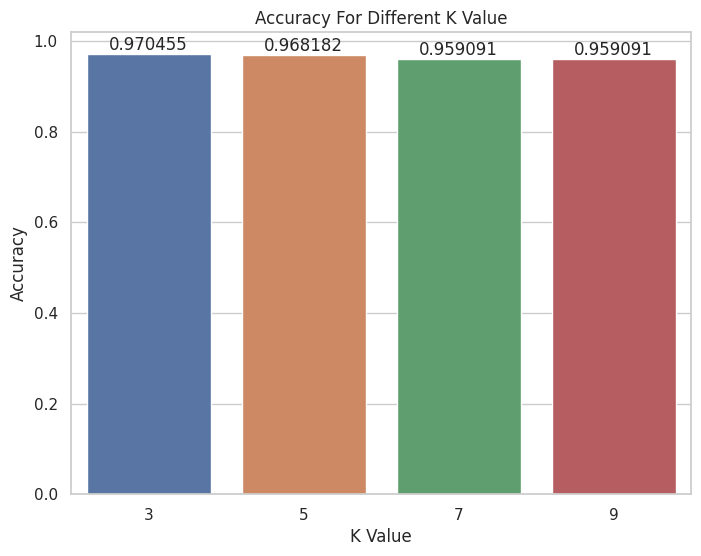

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax=sns.barplot(y='Accuracy',x='K Value',data=compare_knn)
ax.bar_label(ax.containers[0])
plt.title('Accuracy For Different K Value');

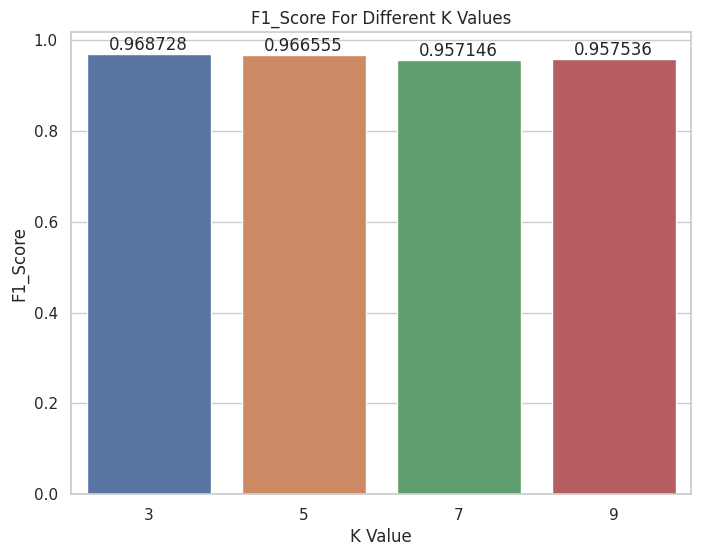

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax=sns.barplot(y='F1_Score',x='K Value',data=compare_knn)
ax.bar_label(ax.containers[0])
plt.title('F1_Score For Different K Values');

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

# Training
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
accuracy_knn = accuracy_score(Y_test, y_pred)
f1_knn=f1_score(Y_test,y_pred_tree, average='macro')
accuracies.append(accuracy_knn*100)
f1.append(f1_knn)
accuracy_knn*100
print("Accuracy of KNN", accuracy_knn*100)
print("f1_score of KNN", f1_knn)

Accuracy of KNN 97.04545454545455
f1_score of KNN 0.9840607725019178


Text(46.25, 0.5, 'Predicted Values')

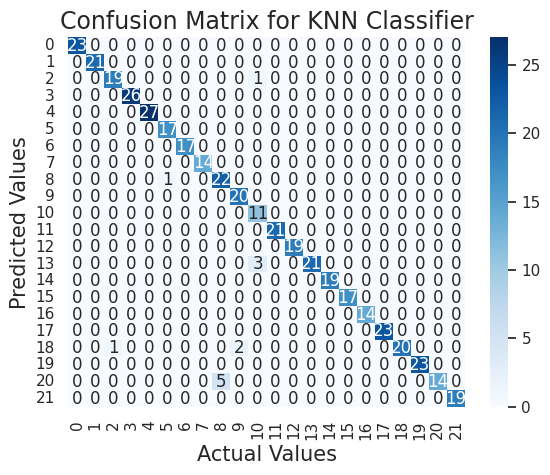

In [ ]:
cpm = confusion_matrix(Y_test, y_pred)

ax = sns.heatmap(cpm, annot=True, cmap='Blues')


plt.title("Confusion Matrix for KNN Classifier", fontsize = 17) # title with fontsize 20
plt.xlabel("Actual Values", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("Predicted Values", fontsize = 15) # y-axis label with fontsize 15

##Naive Bayes

In [ ]:
gb = GaussianNB()

# Training
gb.fit(X_train,Y_train)

y_pred_gb = gb.predict(X_test)

accuracy_gb = accuracy_score(Y_test, y_pred_gb)

f1_gb=f1_score(Y_test,y_pred_gb, average='weighted')

accuracies.append(accuracy_gb*100)

print("Accuracy of Naive Bayes", accuracy_gb*100)
print("f1_score of Naive Bayes", f1_gb)

Accuracy of Naive Bayes 99.54545454545455
f1_score of Naive Bayes 0.9954229797979799


Text(46.25, 0.5, 'Predicted Values')

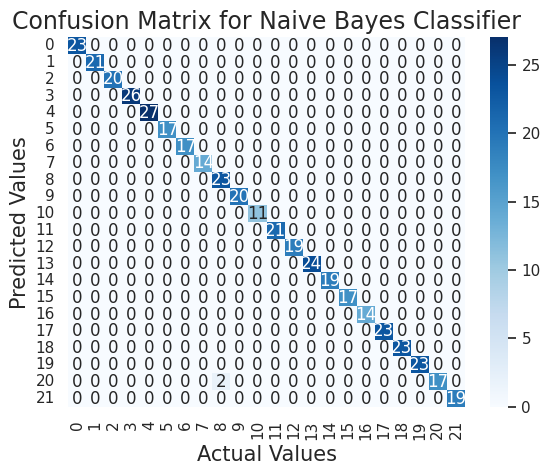

In [ ]:
cm_gb = confusion_matrix(Y_test, y_pred_gb)

ax = sns.heatmap(cm_gb, annot=True, cmap='Blues')


plt.title("Confusion Matrix for Naive Bayes Classifier", fontsize = 17) # title with fontsize 20
plt.xlabel("Actual Values", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("Predicted Values", fontsize = 15) # y-axis label with fontsize 15

##Support Vector Classifier

Results for C = 0.1:
Accuracy of Support Vector Classifier: 88.4090909090909
F1 score of Support Vector Classifier: 0.8662458021521793
--------
Results for C = 1:
Accuracy of Support Vector Classifier: 96.81818181818181
F1 score of Support Vector Classifier: 0.96632056533851
--------
Results for C = 5:
Accuracy of Support Vector Classifier: 97.04545454545455
F1 score of Support Vector Classifier: 0.9686459149736834
--------
Results for C = 10:
Accuracy of Support Vector Classifier: 97.72727272727273
F1 score of Support Vector Classifier: 0.975810405848769
--------
Results for C = 100:
Accuracy of Support Vector Classifier: 98.18181818181819
F1 score of Support Vector Classifier: 0.981860997277376
--------
Results for C = 1000:
Accuracy of Support Vector Classifier: 98.18181818181819
F1 score of Support Vector Classifier: 0.9810833236641472
--------
Results for C = 10000:
Accuracy of Support Vector Classifier: 97.72727272727273
F1 score of Support Vector Classifier: 0.9767053144229159
-

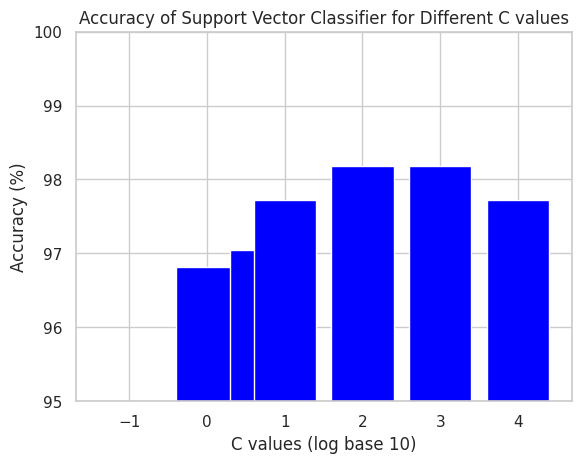

In [ ]:
accuracies = []

# Values of C to iterate over
C_values = [0.1, 1, 5, 10, 100, 1000, 10000]

for c in C_values:
    sv = SVC(kernel='rbf', gamma='scale', C=c)

    # Training
    sv.fit(X_train, Y_train)

    y_pred_svc = sv.predict(X_test)

    accuracy_svc = accuracy_score(Y_test, y_pred_svc)

    # Calculate F1 score for the current model
    f1_svc = f1_score(Y_test, y_pred_svc, average='macro')

    accuracies.append(accuracy_svc * 100)

    print(f"Results for C = {c}:")
    print("Accuracy of Support Vector Classifier:", accuracy_svc * 100)
    print("F1 score of Support Vector Classifier:", f1_svc)
    print("--------")

plt.bar(np.log10(C_values), accuracies, color='blue')  # Use log scale for x-axis
plt.xlabel('C values (log base 10)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Support Vector Classifier for Different C values')
plt.ylim(95, 100)  # adjust y-axis limits
plt.show()


Text(46.25, 0.5, 'Predicted Values')

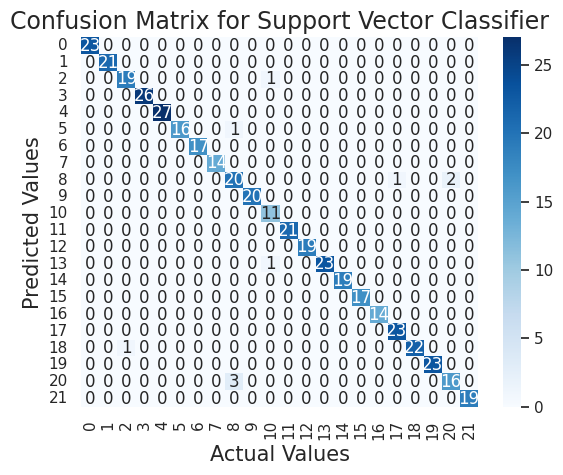

In [ ]:
cm_svc = confusion_matrix(Y_test, y_pred_svc)

ax = sns.heatmap(cm_svc, annot=True, cmap='Blues')


plt.title("Confusion Matrix for Support Vector Classifier", fontsize = 17) # title with fontsize 20
plt.xlabel("Actual Values", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("Predicted Values", fontsize = 15) # y-axis label with fontsize 15

In [ ]:
compare=pd.DataFrame()
compare['Model']=["DT","KNN","NB","SVC"]
compare["Accuracy"]=[accuracy_dt*100,accuracy_knn*100,accuracy_gb*100,accuracy_svc*100]
compare["F1_Score"]=[f1_dt, f1_knn, f1_gb, f1_svc]
compare["Legend"]=['with phosphorous', 'with phosphorous', 'with phosphorous', 'with phosphorous']

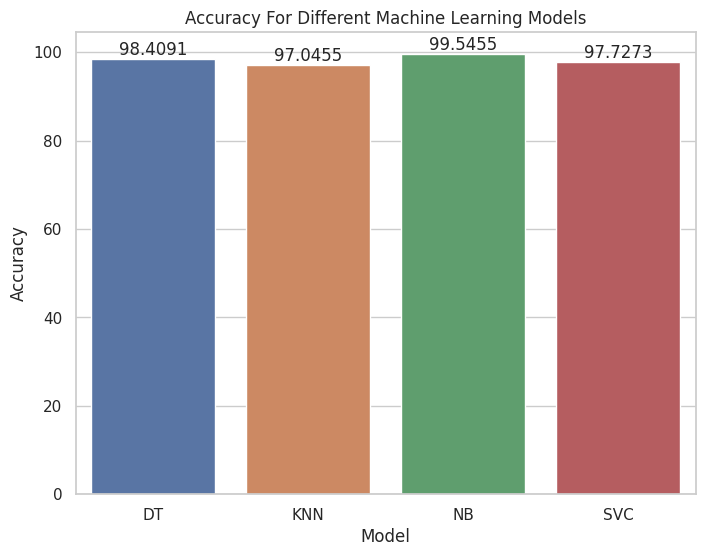

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax=sns.barplot(y='Accuracy',x='Model',data=compare)
ax.bar_label(ax.containers[0]);
plt.title('Accuracy For Different Machine Learning Models');

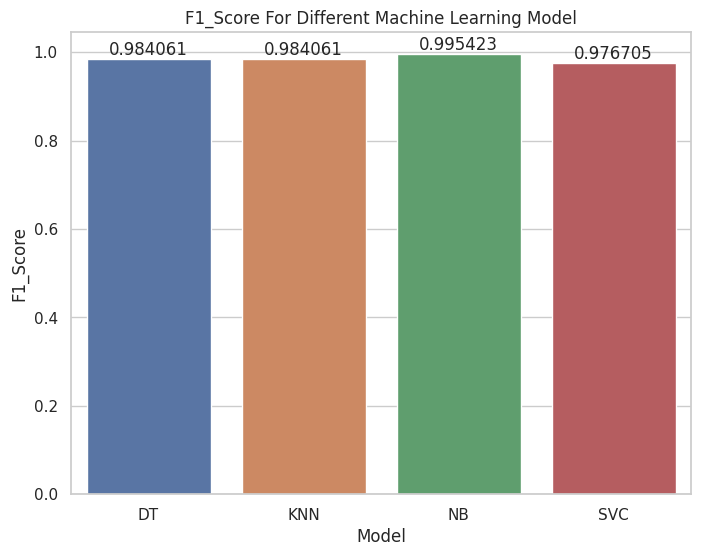

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax=sns.barplot(y='F1_Score',x='Model',data=compare)
ax.bar_label(ax.containers[0])
plt.title('F1_Score For Different Machine Learning Model');

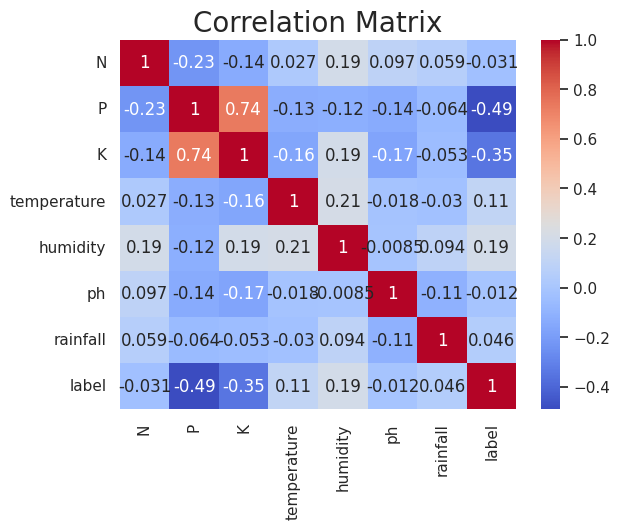

In [ ]:
corr = df.corr()
ax = sns.heatmap(corr,annot=True, cbar=True, cmap='coolwarm')


plt.title("Correlation Matrix", fontsize = 20); # title with fontsize 20

**Phosphorous and potassium has high correlation**.

**Train different models and compare results by deleting the phosphorous**

In [ ]:
features = df[['N','K', 'temperature','humidity','ph','rainfall']]
labels = df['label']

In [ ]:
accuracies=[]
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.20, random_state = 0)

In [ ]:
X_train

,N,K,temperature,humidity,ph,rainfall
1567,27,200,21.452787,90.745319,6.110219,116.703658
2031,81,38,23.765547,87.983299,6.334838,150.316615
2073,90,35,24.251335,89.864541,7.098228,175.174211
1374,81,45,26.904357,86.254262,6.727468,59.759800
279,47,77,17.182484,16.428918,7.561108,72.850173
...,...,...,...,...,...,...
1033,102,48,28.654563,79.286937,5.695268,102.463378
1731,34,51,27.347349,94.177567,6.687088,40.351531
763,35,15,28.474423,63.536045,6.500145,69.527441
835,39,23,25.434598,69.126134,7.685959,41.026829


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_train)

(1760, 6)
[[0.19285714 0.975      0.36232935 0.89225218 0.40327048 0.3463106 ]
 [0.57857143 0.165      0.42869299 0.8600322  0.43831396 0.46713355]
 [0.64285714 0.15       0.44263244 0.88197757 0.55741269 0.55648505]
 ...
 [0.25       0.05       0.56381206 0.574846   0.464104   0.17673404]
 [0.27857143 0.09       0.47658564 0.64005645 0.64910639 0.0742876 ]
 [0.1        0.02       0.24171637 0.89682976 0.47081987 0.33123294]]


##Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
# Training
tree = tree.fit(X_train, Y_train)

y_pred_tree = tree.predict(X_test)
accuracy_dt = accuracy_score(Y_test, y_pred_tree)
f1_dt=f1_score(Y_test,y_pred_tree, average='macro')
accuracies.append(accuracy_dt*100)
f1.append(f1_dt)
print("Accuracy of Decision Tree", accuracy_dt*100)
print("f1_score of Decision Tree", f1_dt)

Accuracy of Decision Tree 99.31818181818181
f1_score of Decision Tree 0.9936701802190823


Text(46.25, 0.5, 'Predicted Values')

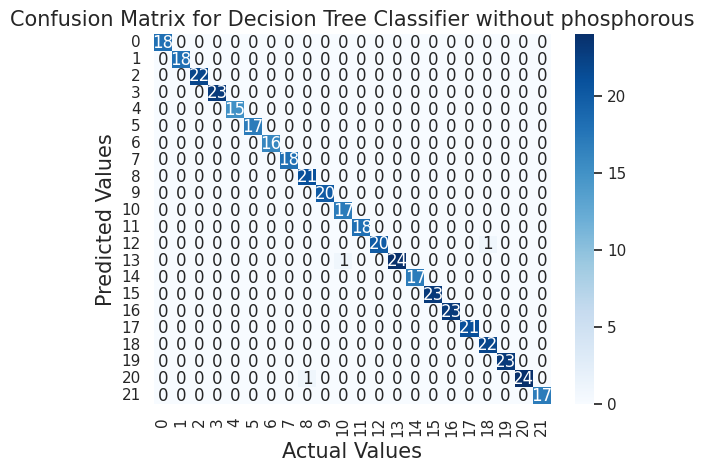

In [ ]:
cm= confusion_matrix(Y_test, y_pred_tree)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

plt.title("Confusion Matrix for Decision Tree Classifier without phosphorous", fontsize = 15) # title with fontsize 20
plt.xlabel("Actual Values", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("Predicted Values", fontsize = 15) # y-axis label with fontsize 15

##KNN Classifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

# Training
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
accuracy_knn = accuracy_score(Y_test, y_pred)
f1_knn=f1_score(Y_test,y_pred_tree, average='macro')
accuracies.append(accuracy_knn*100)
f1.append(f1_knn)
accuracy_knn*100
print("Accuracy of KNN", accuracy_knn*100)
print("f1_score of KNN", f1_knn)

Accuracy of KNN 97.04545454545455
f1_score of KNN 0.9936701802190823


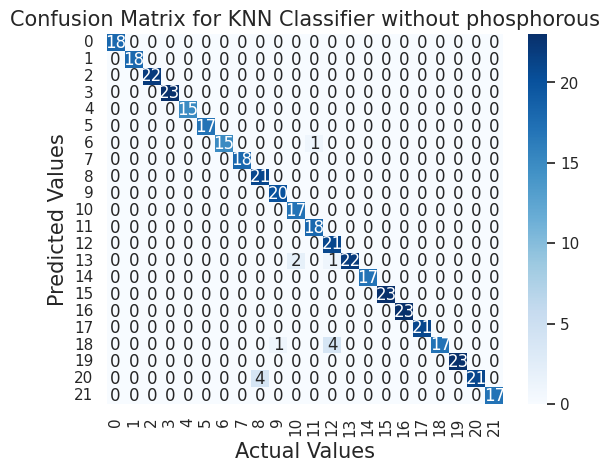

In [ ]:
cpm = confusion_matrix(Y_test, y_pred)

ax = sns.heatmap(cpm, annot=True, cmap='Blues')


plt.title("Confusion Matrix for KNN Classifier without phosphorous", fontsize = 15) # title with fontsize 15
plt.xlabel("Actual Values", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("Predicted Values", fontsize = 15); # y-axis label with fontsize 15

## Naive Bayes

In [ ]:
gb = GaussianNB()

# Training
gb=gb.fit(X_train,Y_train)
GaussianNB()
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
f1_gb=f1_score(Y_test,y_pred_tree, average='weighted')
accuracies.append(accuracy_gb*100)
accuracy_gb*100
print("Accuracy of Naive Bayes", accuracy_gb*100)
print("f1_score of Naive Bayes", f1_gb)

Accuracy of Naive Bayes 99.0909090909091
f1_score of Naive Bayes 0.993191866925357


Text(46.25, 0.5, 'Predicted Values')

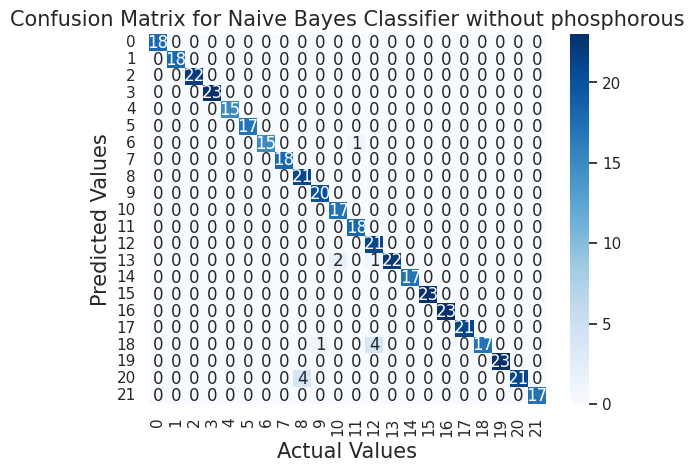

In [ ]:
cpm = confusion_matrix(Y_test, y_pred)

ax = sns.heatmap(cpm, annot=True, cmap='Blues')


plt.title("Confusion Matrix for Naive Bayes Classifier without phosphorous", fontsize = 15) # title with fontsize 20
plt.xlabel("Actual Values", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("Predicted Values", fontsize = 15) # y-axis label with fontsize 15

## Support Vector Classifier

Results for C = 0.1:
Accuracy of Support Vector Classifier: 87.95454545454545
F1 score of Support Vector Classifier: 0.884321459339935
--------
Results for C = 1:
Accuracy of Support Vector Classifier: 96.13636363636363
F1 score of Support Vector Classifier: 0.9630186547494861
--------
Results for C = 5:
Accuracy of Support Vector Classifier: 97.95454545454545
F1 score of Support Vector Classifier: 0.9805942722214979
--------
Results for C = 10:
Accuracy of Support Vector Classifier: 97.95454545454545
F1 score of Support Vector Classifier: 0.9812316658169012
--------
Results for C = 100:
Accuracy of Support Vector Classifier: 98.18181818181819
F1 score of Support Vector Classifier: 0.9831596967058975
--------
Results for C = 1000:
Accuracy of Support Vector Classifier: 98.63636363636363
F1 score of Support Vector Classifier: 0.986978627699398
--------
Results for C = 10000:
Accuracy of Support Vector Classifier: 98.63636363636363
F1 score of Support Vector Classifier: 0.986886556275402

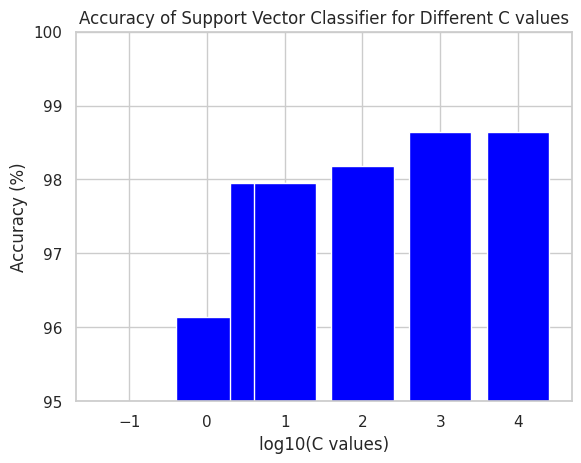

In [ ]:
accuracies = []

# Values of C to iterate over
C_values = [0.1, 1, 5, 10, 100, 1000, 10000]

for c in C_values:
    sv = SVC(kernel='rbf', gamma='scale', C=c)

    # Training
    sv.fit(X_train, Y_train)

    y_pred_svc = sv.predict(X_test)

    accuracy_svc = accuracy_score(Y_test, y_pred_svc)

    # Calculate F1 score for the current model
    f1_svc = f1_score(Y_test,y_pred_svc, average='macro')

    accuracies.append(accuracy_svc * 100)

    print(f"Results for C = {c}:")
    print("Accuracy of Support Vector Classifier:", accuracy_svc * 100)
    print("F1 score of Support Vector Classifier:", f1_svc)
    print("--------")

plt.bar(np.log10(C_values), accuracies, color='blue')  # Use log scale for x-axis
plt.xlabel('log10(C values)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Support Vector Classifier for Different C values')
plt.ylim(95, 100)  # adjust y-axis limits
plt.show()


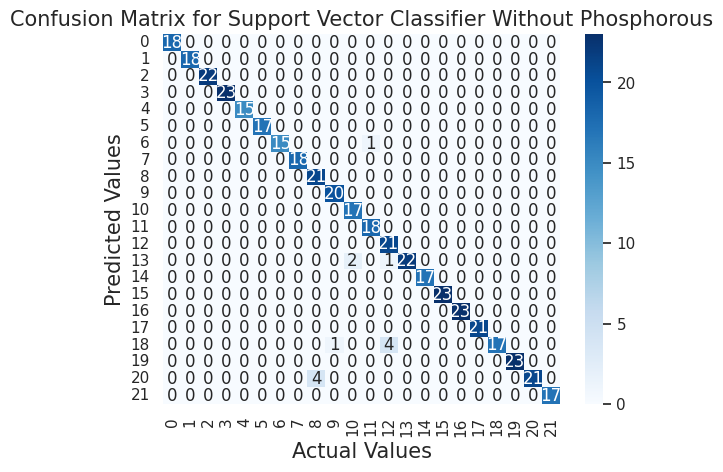

In [ ]:
cpm = confusion_matrix(Y_test, y_pred)

ax = sns.heatmap(cpm, annot=True, cmap='Blues')


plt.title("Confusion Matrix for Support Vector Classifier Without Phosphorous", fontsize = 15) # title with fontsize 20
plt.xlabel("Actual Values", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("Predicted Values", fontsize = 15); # y-axis label with fontsize 15

In [ ]:
compare_without_P=pd.DataFrame()
compare_without_P['Model']=["DT","KNN","NB","SVC"]
compare_without_P["Accuracy"]=[accuracy_dt*100,accuracy_knn*100,accuracy_gb*100,accuracy_svc*100]
compare_without_P["F1_Score"]=[f1_dt, f1_knn, f1_gb, f1_svc]
compare_without_P["Legend"]=['without phosphorous','without phosphorous', 'without phosphorous', 'without phosphorous']

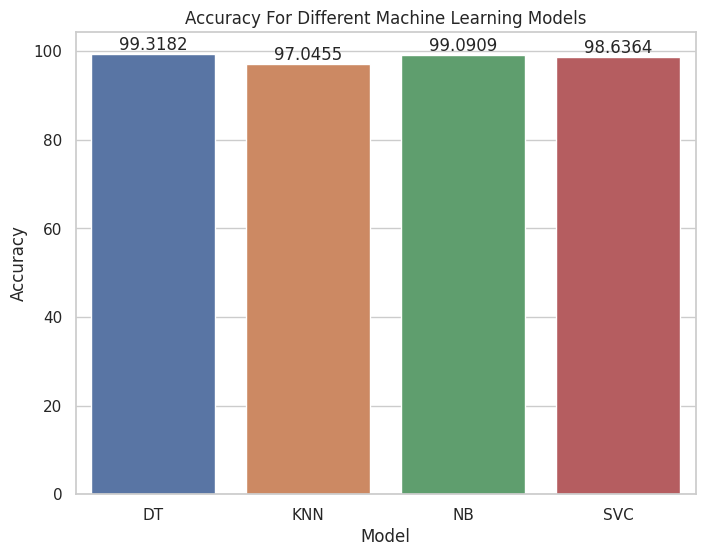

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax=sns.barplot(y='Accuracy',x='Model',data=compare_without_P)
ax.bar_label(ax.containers[0])
plt.title('Accuracy For Different Machine Learning Models');

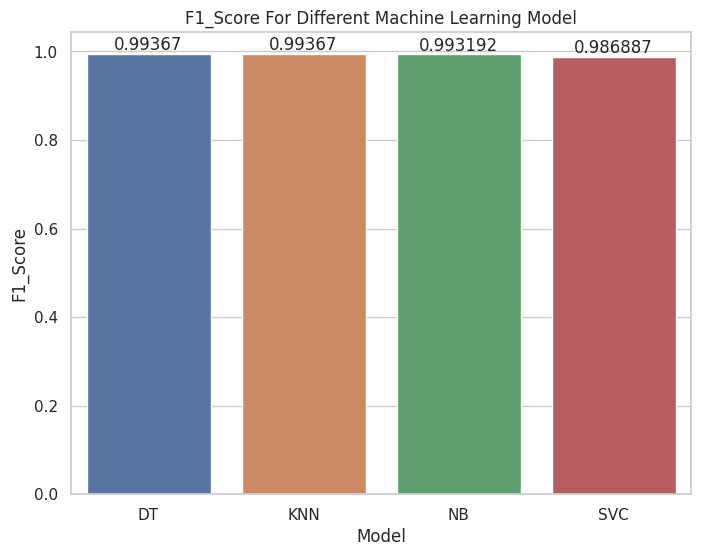

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax=sns.barplot(y='F1_Score',x='Model',data=compare_without_P)
ax.bar_label(ax.containers[0])
plt.title('F1_Score For Different Machine Learning Model');

In [ ]:
combine=compare.append(compare_without_P)

<ipython-input-93-2cd61d923f7b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine=compare.append(compare_without_P)


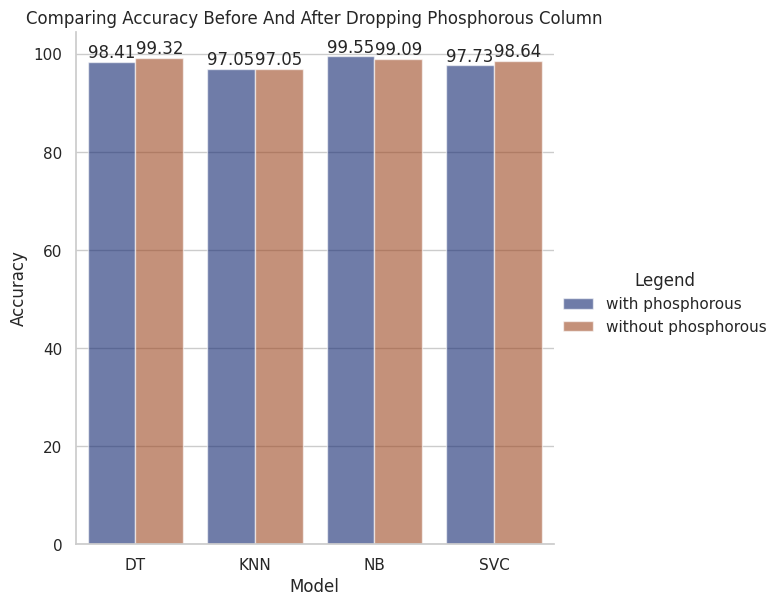

In [ ]:
g = sns.catplot(
    data=combine, kind="bar",
    x="Model", y="Accuracy", hue="Legend",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.title('Comparing Accuracy Before And After Dropping Phosphorous Column');

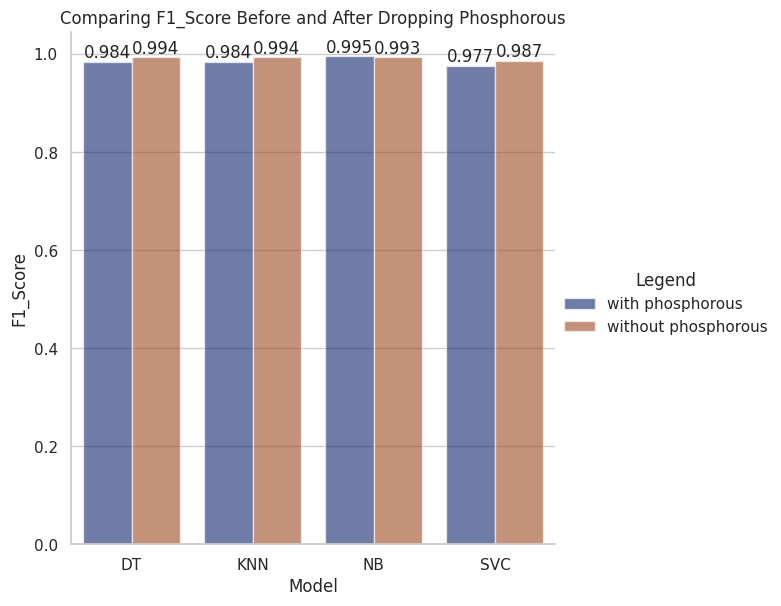

In [ ]:
g = sns.catplot(
    data=combine, kind="bar",
    x="Model", y="F1_Score", hue="Legend",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.3f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.title('Comparing F1_Score Before and After Dropping Phosphorous');

In [ ]:
values = [[27,	200,	21.452787,	90.745319,	6.110219,	116.703658]]
values = scaler.transform(values)
print(values)

[[0.19285714 0.975      0.36232936 0.89225217 0.40327051 0.3463106 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
values = [[0.19285714, 0.975, 0.36232935, 0.89225218, 0.40327048, 0.3463106 ]]
y_pred= gb.predict(values);
y_pred[0]

0

In [ ]:
crops=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton',
 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans',
 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate',
 'rice' ,'watermelon']
print(crops[y_pred[0]])

apple
